## Playing with sampling and the Central Limit Theorem

Begin with imports:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's create a population that isn't normally distributed we will concatenate several normal distributions to do so:

In [34]:
d1 = np.random.normal(loc=-6.4, scale=1.2, size=40000)
d2 = np.random.normal(loc=4, scale=10, size=16000)
d3 = np.random.normal(loc=22, scale=8, size=72000)
population = np.concatenate([d1, d2, d3])
pop = pd.DataFrame(data=population, columns=['population'])
pop.head()

,population
0,-6.868273
1,-9.914075
2,-6.590729
3,-5.578707
4,-4.944101


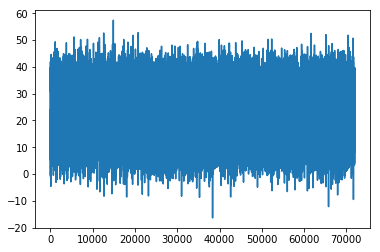

In [4]:
plt.plot(d3)

## Make a histogram. Play around with bin size

Hint: there are multiple ways to do this. Try numpy.histogram or the pandas method hist.

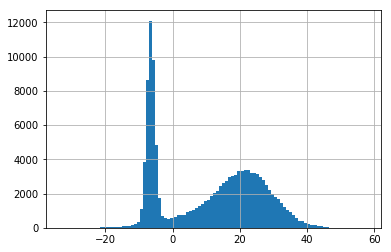

In [5]:
pop['population'].hist(bins= 100)

Extra: Try displaying the data using an alternate visualization technique, a violin plot. Seaborn has a built-in method that is useful for this.

C:\Users\Yohan_Min\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


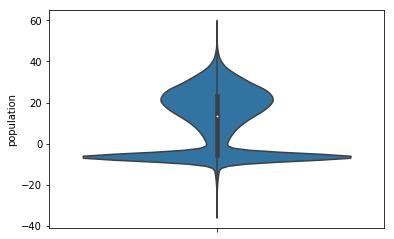

In [6]:
import seaborn as sns
ax = sns.violinplot(y='population', data=pop)

## Make a kernel density estimate of the population distribution

Hint: pandas.DataFrame.plot.kde

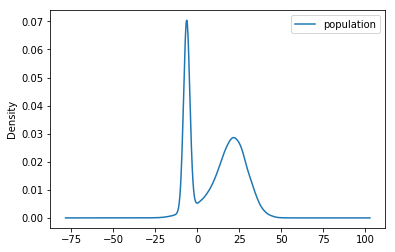

In [7]:
pop.plot.kde()

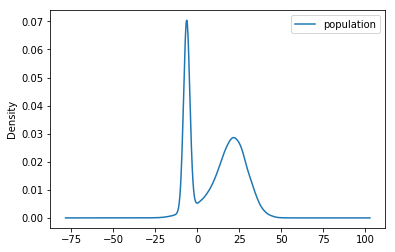

In [8]:
pop.plot(kind='kde')

## Compute the mean of the population

In [134]:
pop['population'].mean()

10.90863341475794

## Computer the standard deviation of the population

In [135]:
pop['population'].std()

14.778935437369228

In [36]:
pop['population'].head()

0   -6.868273
1   -9.914075
2   -6.590729
3   -5.578707
4   -4.944101
Name: population, dtype: float64

In [88]:
pop.iloc[:,0]


0         -6.868273
1         -9.914075
2         -6.590729
3         -5.578707
4         -4.944101
5         -5.854893
6         -3.972222
7         -3.594506
8         -4.931525
9         -3.558388
10        -6.816814
11        -6.966958
12        -5.817690
13        -5.506232
14        -8.905881
15        -7.525754
16        -6.319837
17        -6.595737
18        -5.944517
19        -7.385454
20        -5.865288
21        -6.615184
22        -5.750414
23        -7.519465
24        -5.378743
25        -7.274492
26        -7.305575
27        -7.462930
28        -6.366272
29        -7.160391
            ...    
127970    27.050554
127971    28.477361
127972    20.851835
127973    16.220390
127974    16.749552
127975    23.894199
127976     9.795217
127977    20.175045
127978    21.614956
127979    24.150765
127980    15.983386
127981    16.845327
127982    12.069820
127983    18.354729
127984    15.010195
127985    12.190439
127986    25.690507
127987    26.186990
127988    21.396990


In [85]:
np.random.choice(pop.iloc[:,0], 10)

array([-4.73343757, -8.63163689, 13.43948165, 19.14477628, 17.48356783,
       19.05550562, 24.63408369, -6.07682281, 39.98646669, 28.68311945])

## We have described our population. Now let's draw a sample of size n and look at the distrubtion of our sample mean and s.d.

Write a function that samples the pop dataframe with an argument n that is the number of samples to take. Sample without replacement.

In [43]:
subset = np.random.choice(np.array(list(pop.index)), size=10, replace=False)
pop['population'][subset].values

array([-7.41230305, 10.62666569, -4.91474732, 39.57206385, -5.38132014,
       -5.37424637, 22.98958976, -6.9241353 , 16.05727815,  4.20261429])

In [141]:
np.array(list(pop.index))

array([     0,      1,      2, ..., 127997, 127998, 127999])

In [47]:
np.array(list(pop.index))

array([[-6.86827331],
       [-9.91407483],
       [-6.59072903],
       ...,
       [26.13933592],
       [-0.73822579],
       [23.57897917]])

In [16]:
def draw_sample(pop, n):
    subset = np.random.choice(np.array(pop.index), size=n, replace=False)
    sample = pd.DataFrame(data=pop['population'][subset].values, columns=['population'])
    return sample

In [90]:
def draw_sample(pop, n):
    sample = np.random.choice(pop.iloc[:,0], size=n, replace=False)
    return sample

In [91]:
sample = draw_sample(pop, 20)

In [95]:
sample.mean()

13.125328363583879

## Now we want to draw repeated samples of size *n* from the population

Create another function that calls the first `samples` times. Have `samples` be an argument to the function along with n which is the argument to the first function. For each sample, append the mean and the standard deviation of the sample to two separate lists and return them.

Hint: use a loop with    range(samples) iterations. To create an empty list at the start of a function, try something like:

    def repeat_samples(samples, n):  
      means = []  
      sds = []  
      ...  
      return (means, sds)
    
then use the append method to append each mean and sd value to the end of each respective list.

In [97]:
def repeat_samples(pop, samples, n):
    means = []
    sds = []
    
    for i in range(samples):
        sample = draw_sample(pop, n)
        means.append(sample.mean())
        sds.append(sample.std())
    
    return (means, sds)

In [106]:
means, sds = repeat_samples(pop, 30, 30)
means

[10.217456441360808,
 11.709153013316328,
 7.190104874268278,
 11.271434433314905,
 15.72606304777056,
 11.379370048355735,
 11.210423722687938,
 7.475636995501142,
 12.388060521398682,
 10.965472987015717,
 9.0292360331554,
 17.601265724651803,
 19.249701190338637,
 9.913046215488873,
 12.321110520365595,
 7.05444221901519,
 13.869544471911734,
 15.518537276923764,
 9.078538874873912,
 11.998220621635877,
 7.715451089970113,
 9.185482453945005,
 7.099614729326197,
 7.4454755315705,
 13.436745184416528,
 10.741100947459532,
 10.22907181383504,
 8.198165840152042,
 12.20002241622843,
 13.85415786442149]

## Almost there!

Now make a function with two arguments `samples` and `n` that takes the return values from the last function and
* converts the lists to a single dataframe
* plots two histograms of the columns (mean, sd)
* prints out the mean and sd of the columns

Hint: to get a multi-valued return into new variables, try this:

    means, sds = repeat_samples(samples, n)
    df = pd.DataFrame(data={'means: means, 'sds': sds})

In [99]:
def describe_sample(pop, samples, n):
    means, sds = repeat_samples(pop, samples, n)
    df = pd.DataFrame(data={'means': means, 'sds': sds})
    
    df.hist(bins=100)
    print('Mean: {}'.format(np.round(df['means'].mean(), 2)))
    print('Std Dev: {}'.format(np.round(df['sds'].mean(), 2)))
    print('Std Err: {}'.format(np.round(df['means'].std(), 2)))
    print('Std Err: {}'.format(np.round(df['sds'].mean()/ np.sqrt(n), 2)))
    
    return df

Mean: 10.78
Std Dev: 14.68
Std Err: 1.49
Std Err: 1.47


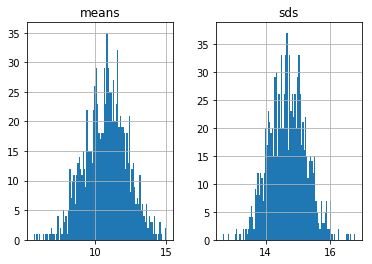

In [100]:
df = describe_sample(pop, 1000, 100)

Mean: 10.97
Std Dev: 14.46
Std Err: 2.84
Std Err: 2.64


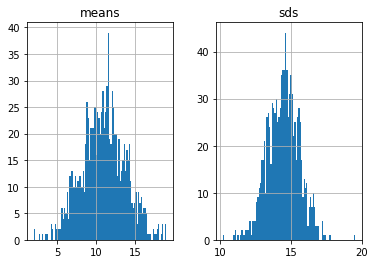

In [101]:
df = describe_sample(pop, 1000, 30)

Mean: 10.98
Std Dev: 12.84
Std Err: 6.63
Std Err: 5.74


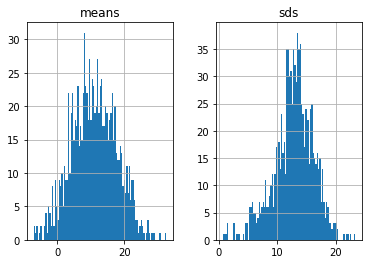

In [102]:
df = describe_sample(pop, 1000, 5)

Mean: 10.78
Std Dev: 0.0
Std Err: 14.75
Std Err: 0.0


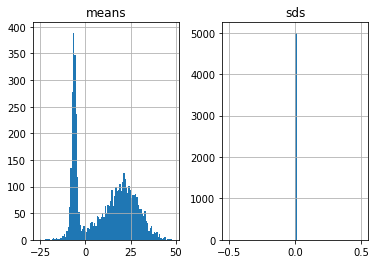

In [103]:
df = describe_sample(pop, 5000, 1)

> **If n is over 30, std. dev of one sample could be considered to represent the population std. dev.**

## Run your final function several times with varying values of samples and n

How did your result begin to converge on the population mean and sd?

## Bootstrapping your data: Finding confidence intervals

Statisticians take advantage of the central limit theorem as a method of establishing confidence intervals. Create a function that finds the nth and (100-n)th percentiles of the distribution of means found with describe_sample.

In [111]:
def bootstrapping(pop, sample, n, percentile):
    df = describe_sample(pop, sample, n)
    li = df['means'].quantile(q=percentile)
    ui = df['means'].quantile(q=1-percentile)
    mean = df['means'].mean()
    std_err = df['means'].std()
    
    print('Mean: {}, Std error: {}, and CI: {} - {}'.format(np.round(mean, 2), np.round(std_err, 2), 
                                                            np.round(li, 2), np.round(ui, 2)))
    
    return df, mean, ui, li, std_err

Mean: 10.91
Std Dev: 14.67
Std Err: 1.48
Std Err: 1.47
Mean: 10.91, Std error: 1.48, and CI: 8.46 - 13.38


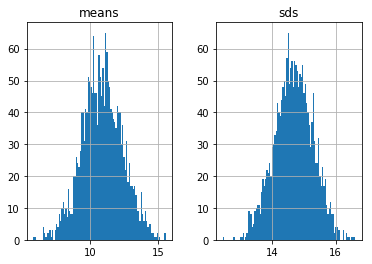

In [113]:

df, mean, ui, li, std_err = bootstrapping(pop, 2000, 100, 0.05)